In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import mplfinance as mpf
import statsmodels.api as sm

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

import requests
from bs4 import BeautifulSoup
import json
from pandas import DataFrame as df

In [2]:
covid_data = pd.read_csv('covid-data.csv')
print(covid_data.columns)
country_df = covid_data.location.unique()
print(country_df)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

<AxesSubplot:xlabel='date'>

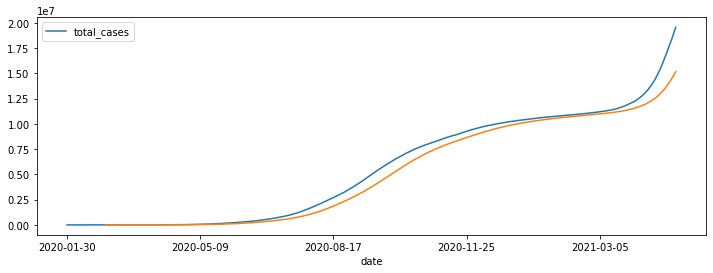

In [3]:
indexes = covid_data[covid_data['location']=='India'].index
india = covid_data.loc[indexes, 'date':'total_cases']
india = india.dropna()
india.set_index('date', inplace=True)
india.plot(figsize=(12, 4))
india.rolling(window=30).mean()['total_cases'].plot()

Index(['new_cases_per_million'], dtype='object')


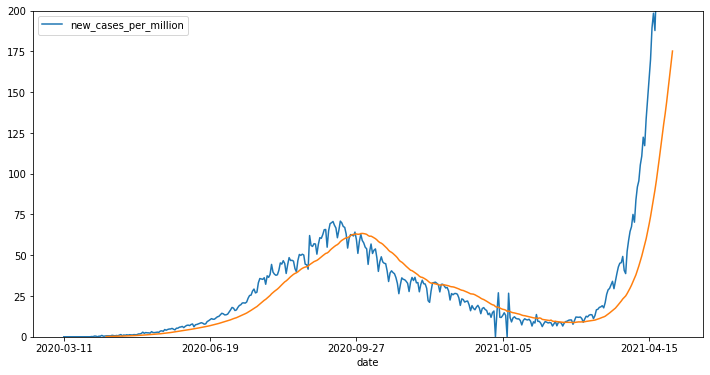

In [4]:
def plot_data(country, col, plot_ma=False, y_max=200):
    indexes = covid_data[covid_data['location']==country].index
    country_df = covid_data.loc[indexes, 'date':col]
    country_df = country_df.dropna()
    country_df.set_index('date', inplace=True)
    
    country_df.drop(country_df.columns.difference([col]), 1, inplace=True)
    country_df.plot(figsize=(12,6), ylim=[0,y_max])
    
    if plot_ma:
        country_df.rolling(window=30).mean()[col].plot()
    print(country_df.columns)
    
plot_data('India', 'new_cases_per_million', True)

Index(['total_cases'], dtype='object')


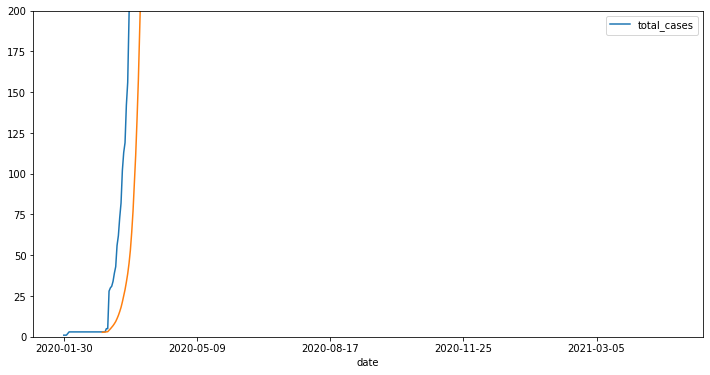

In [5]:
plot_data('India', 'total_cases', True)

Index(['total_deaths_per_million'], dtype='object')


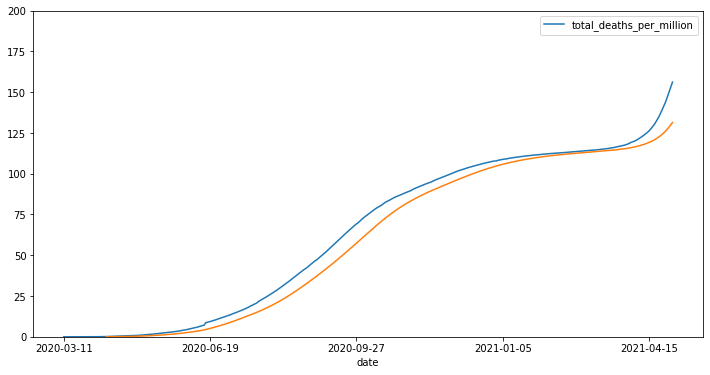

In [6]:
plot_data('India', 'total_deaths_per_million', True)

Index(['new_deaths_per_million'], dtype='object')


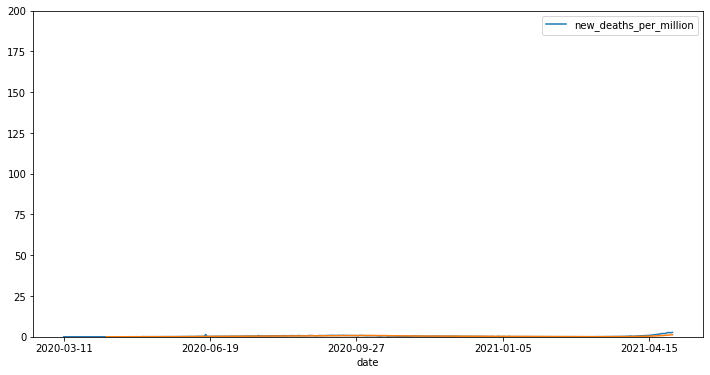

In [7]:
plot_data('India', 'new_deaths_per_million', True)

Index(['total_deaths'], dtype='object')


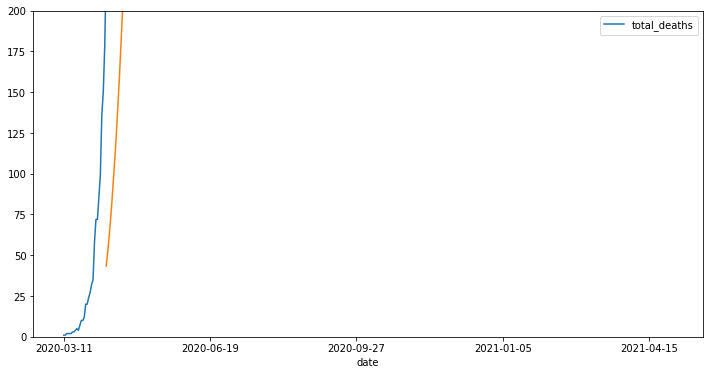

In [8]:
plot_data('India', 'total_deaths', True)

Index(['new_cases_per_million'], dtype='object')


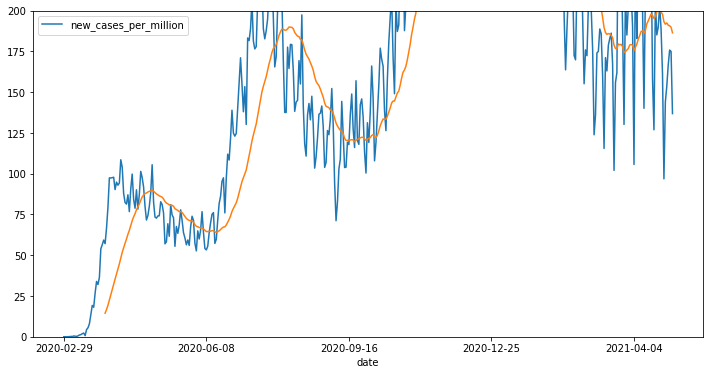

In [9]:
plot_data('United States', 'new_cases_per_million', 200)

Index(['total_cases'], dtype='object')


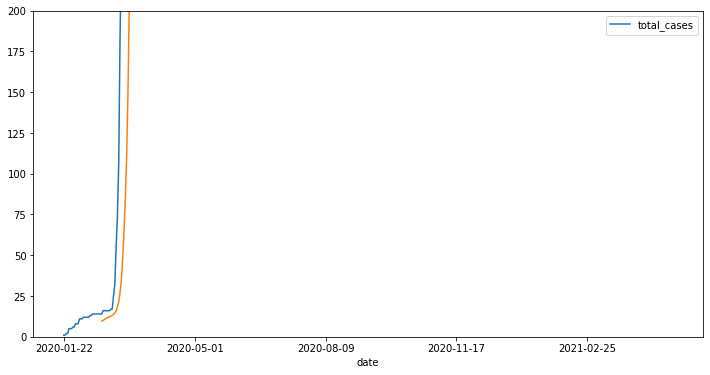

In [11]:
plot_data('United States', 'total_cases', True)

In [12]:
def scatter_plot(date, col1, col2):
    tot_df = pd.DataFrame(columns = ['date', 'location', col1, col2])
    for c in country_df:
        temp_df = covid_data[(covid_data['location']==c) & (covid_data['date']==date)][['date', 'location', col1, col2]]
        tot_df = tot_df.append(temp_df, ignore_index = True).fillna(0)
    tot_df.set_index('date', inplace=True)
    
    fig = px.scatter(data_frame=tot_df, x=col2, 
                     y=col1, color="location", trendline="ols",
                 hover_data=['location'])
    fig.show()
    
    return tot_df

scatter_plot('2020-10-27', 'total_deaths_per_million', 'aged_70_older') 

,location,total_deaths_per_million,aged_70_older
date,,,
2020-10-27,Afghanistan,39.175,1.337
2020-10-27,Africa,31.172,0.000
2020-10-27,Albania,169.226,8.643
2020-10-27,Algeria,44.035,3.857
2020-10-27,Andorra,931.858,0.000
...,...,...,...
2020-10-27,Vietnam,0.360,4.718
2020-10-27,World,149.889,5.355
2020-10-27,Yemen,20.083,1.583
